<a href="https://colab.research.google.com/github/dduniverse/ML-study/blob/main/10_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost
부스팅: 순차적으로 트리를 만들어 이전 트리로부터 더 나은 트리를 만들어내는 알고리즘
- 트리 모델을 기반으로 한 최신 알고리즘 중 하나
- XGBoost, LightGBM, CatBoost 등

XGBoost
- 가장 먼저 개발된 부스팅 알고리즘
- 손실 함수뿐만 아니라 모형 복잡도까지 고려함
- 캐글 컴피티션 우승자가 많이 사용하는 성능이 검증된 부스팅 모델

|장점|단점|
|---|---|
|예측 속도가 상당히 빠르며, 예측력 또한 좋음|복잡한 모델인 만큼, 해석이 어려움|
|변수 종류가 많고 데이터가 클수록 상대적으로 뛰어난 성능을 보여줌|더 나은 성능을 위한 하이퍼파라미터 튜닝이 까다로움|

- 종속변수가 연속형 데이터인 경우든 범주형 데이터인 경우든 모두 사용 가능
- 이미지나 자연어가 아닌 표로 정리된 데이터의 경우, 거의 모든 상황에 활용할 수 있음

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data = pd.read_csv(file_url)
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [3]:
pd.options.display.max_columns = 40  # 총 40개 컬럼까지 츌력되도록 설정

In [4]:
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

- has_null: 해당 행의 변수 중 Null값이 있는지 여부(0 또는 1)
- age/age_o: 본인 나이/상대방 나이
- race/race_o: 본인 인종/상대방 인종
- importnace_same_race/importance_same_religion: 인종과 종교를 중요시 여기는 지
- attractice, sincere, intelligence, funny, ambitious, shared_interests: 매력적인, 성실한, 지적인, 재미난, 야심찬, 공통관심사
  - pref_o_xxx: 상대방이 xxx 항목을 얼마나 중요하게 생각하는 가
  - xxx_o: 상대방이 본인에 대한 xxx 항목을 평가
  - xxx_importance: xxx 항목에 대해 본인이 얼마나 중요하게 생각하는 가
- xxx_partner: 본인이 상대방에 대한 xxx 항목을 평가
- intersets_correlate: 관심사 연관도
- expected_happy_with_sd_people: 스피드 데이팅을 통해 만난 사람과 함께할 때 얼마나 좋을 지에 대한 기대치
- expected_num_intersted_in_me: 얼마나 많은 사람이 나에게 관심을 보일지에 대한 기대치
- like: 파트너가 마음에 들었는지 여부
- guess_prob_liked: 파트너가 나를 마음에 들어했을 지에 대한 예상
- met: 파트너를 스피드 데이팅 이벤트 이전에 만난 적이 있는지 여부

In [6]:
round(data.describe(), 2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


최댓값을 살펴보면 조금 특이한 부분이 존재함
- 본인 및 상대방을 평가하는 함수(xxx_o, xxx_partner)에서는 최댓값이 대체로 10으로 일정
- 중요도와 관련된 변수(pref_o_xxx, xxx_important)에서는 최댓값이 100부터 60, 50 등 변수별로 다양함

이 데이터에서 평가 관련 변수는 0~10점까지 개별 항목에 적용하며, 중요도 관련 변수는 총 100점을 각 항목에 분배해 적용함

## 전처리: 결측치 처리

In [7]:
data.isnull().mean()  # 결측치 비율 확인

has_null                         0.000000
gender                           0.000000
age                              0.011339
age_o                            0.012413
race                             0.007520
race_o                           0.008713
importance_same_race             0.009429
importance_same_religion         0.009429
pref_o_attractive                0.010623
pref_o_sincere                   0.010623
pref_o_intelligence              0.010623
pref_o_funny                     0.011697
pref_o_ambitious                 0.012772
pref_o_shared_interests          0.015397
attractive_o                     0.025304
sincere_o                        0.034256
intelligence_o                   0.036524
funny_o                          0.042970
ambitous_o                       0.086178
shared_interests_o               0.128432
attractive_important             0.009429
sincere_important                0.009429
intellicence_important           0.009429
funny_important                  0

대부분의 변수에서 결측치가 보이나 대체로 5% 미만임
- 중요도와 관련된 변수들은 결측치를 제거하고
- 평가 점수에 관한 변수는 결측치를 하나의 응답 종류로 간주하여 사용

In [8]:
data = data.dropna(subset = ['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 
                             'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important'])  # 일부 변수에서 결측치 제거

In [9]:
data = data.fillna(-99)  # 남은 결측치는 -99로 대체

## 전처리: 피처 엔지니어링

(1) 나이 관련 변수

In [10]:
def age_gap(x):
  # 남여 중 한 명이라도 -99이면 -99를 반환
  if x['age'] == -99:
    return -99
  elif x['age_o'] == -99:
    return -99 
  elif x['gender'] == 'female':  # 여자가 연상이면 마이너스 값 반환
    return x['age_o'] - x['age']
  else:  # 남자가 연상이면 플러스 값 반환
    return x['age'] - x['age_o']

In [11]:
data['age_gap'] = data.apply(age_gap, axis=1)  # age_gap 함수 적용

In [12]:
data['age_gap_abs'] = abs(data['age_gap'])  # 절댓값 적용

(2) 인종 관련 변수

In [13]:
def same_race(x):
  # 본인/상대방 중 한 명이라도 -99이면 -99 반환
  if x['race'] == -99:
    return -99
  elif x['race'] == -99:
    return -99
  elif x['race'] == x['race_o']:  # 같은 인종이면 1 리턴
    return 1
  else:  # 다른 인종이면 -1 리턴
    return -1

In [14]:
data['same_race'] = data.apply(same_race, axis=1)  # same_race 함수 적용

In [15]:
def same_race_point(x):
  # -99이면 -99 리턴
  if x['same_race'] == -99:
    return -99
  else:
    return x['same_race'] * x['importance_same_race']  # 동일 일종 여부의 중요도 계산

In [16]:
data['same_race_point'] = data.apply(same_race_point, axis=1)  # same_race_point 함수 적용

(3) attracitce, sincere 등에 대한 평가/중요도 변수

In [17]:
def rating(data, importance, score):
  # importance, score 중 하나라도 -99이면 -99 리턴
  if data[importance] == -99:
    return -99
  elif data[score] == -99:
    return -99
  else:
    return data[importance] * data[score]  # 평가 점수 x 중요도

In [18]:
data.columns[8:14]

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [19]:
partner_imp = data.columns[8:14]      # 상대방의 중요도
partner_rate_me = data.columns[14:20] # 본인에 대한 상대방의 평가
my_imp = data.columns[20:26]          # 본인의 중요도
my_rate_partner = data.columns[26:32] # 상대방에 대한 본인의 평가

In [20]:
new_label_partner = ['attractive_p', 'sincere_partner_p', 'intelligence_p', 'funny_p', 'ambition_p', 'shared_interests_p']  # 상대방 관련 새 변수 이름
new_label_me = ['attractive_m', 'sincere_partner_m', 'intelligence_m', 'funny_m', 'ambition_m', 'shared_interests_m']  # 본인 관련 새 변수 이름

In [21]:
# 상대방에 관련된 변수 rating 함수 적용
for i, j, k in zip(new_label_partner, partner_imp, partner_rate_me):
  data[i] = data.apply(lambda x: rating(x, j, k), axis=1)

In [22]:
# 본인에 관련된 변수 rating 함수 적용
for i, j, k in zip(new_label_me, my_imp, my_rate_partner):
  data[i] = data.apply(lambda x: rating(x, j, k), axis=1)

In [23]:
# object 변수 더미 변환
data = pd.get_dummies(data, columns = ['gender', 'race', 'race_o'], drop_first=True)

## 모델링 및 평가

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('match', axis=1), data['match'], test_size=0.2, random_state=100)  # train/test 분리

In [25]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=100)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

0.8616236162361623

In [27]:
print(confusion_matrix(y_test, pred))  # 혼동 행렬

[[1291   74]
 [ 151  110]]


In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.60      0.42      0.49       261

    accuracy                           0.86      1626
   macro avg       0.75      0.68      0.71      1626
weighted avg       0.85      0.86      0.85      1626



|실제/예측|0|1|
|:---:|:---:|:---:|
|0|1291(TN)|74(FP)|
|1|151(FN)|110(TP)|

정밀도(precision): 1로 예측한 경우 중, 얼마만큼이 실제로 1인지
$$\frac{TP}{TP+FP} = \frac{양성을 양성으로 판단}{양성을 양성으로 판단 + 1종 오류} = \frac{양성을 양성으로 판단}{양성으로 판단한 수}$$
- FP가 커질수록 분모가 커지기 떄문에 정밀도는 낮아짐(1종오류와 관련)

재현율(recall): 실제로 1 중에 얼마만큼을 1로 예측했는지
$$\frac{TP}{TP+FN} = \frac{양성을 양성으로 판단}{양성을 양성으로 판단 + 2종 오류} = \frac{양성을 양성으로 판단}{실제로 양성인 수}$$
- FN이 커질수록 재현율은 작아짐(2종 오류와 관련)

F1-score: 정밀도와 재현율의 조화평균
$$2 \times \frac{precision \times recall}{precision + recall} = 2 \times \frac{정밀도 \times 재현율}{정밀도 + 재현율}$$
- 조화평균값이므로 정밀도와 재현율이 높을 때 당연히 함께 높이지며, 둘의 값이 비슷할수록 더 높은 값을 보여줌
  - 0.8, 0.6일 때보다 0.7, 0.7일 때 더 높은 값을 나타냄


1종 오류가 중요하면 정밀도에, 2종 오류가 중요하면 재현율에 더욱 신경 써야 함
- 특별시 더 중요한 오류 유형이 없으면 F1-score를 보는게 무난한 방법임

## 경사하강법
경사하강법: 머신러닝이 학습시킬 때 최소의 오차를 찾는 방법
- 오차식에 대한 미분계수를 통해 매개변수의 이동 방향과 보폭을 결정함
- 오찻값 그래프에서 접선의 기울기를 확인하여 그 기울기가 0인 지점으로 매개변수를 이동시킴
- 미분계수(접선의 기울기) 값이 양수이면 매개변수를 왼쪽으로, 음수이면 오른쪽으로 움직이며, 기울기의 절댓값이 작을수록 더 조금씩 움직임


# 하이퍼파라미터 튜닝: 그리드 서치
그리드 서치에 입력할 하이퍼파라미터 후보들을 입력하면, 각 조합에 대해 모두 모델링해보고 최적의 결과가 나오는 하이퍼파라미터 조합을 알려줌

- learning_rate: 경사하강법에서 매개변수를 얼만큼씩 이동해가면서 최소 오차를 찾을지 그 보폭을 결정
- max_depth: 각 트리의 깊이
- subsample: 모델을 학습시킬 때 사용할 데이터의 비율(0.5이면 데이터의 절반 사용)
- n_estimators: 전체 나무의 개수

In [ ]:
# 시간이 매우 오래 소요되므로 실행 생략

In [29]:
from sklearn.model_selection import GridSearchCV
# 하이퍼파라미터 정의
parameters = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 7, 10],
    'subsample': [0.5, 0.7, 1],
    'n_estimators': [300, 500, 1000]
}

In [ ]:
model = xgb.XGBClassifier()
gs_model = GridSearchCV(model, parameters, n_jobs=-1, scoring='f1', cv=5)  # 그리드서치 객체 생성(scoring: 최적의 모델 판단 기준)
gs_model.fit(X_train, y_train)  # 학습
gs_model.best_params_  # 최적의 하이퍼파라미터 출력

In [ ]:
pred = gs_model.predict(X_test)
accuracy_score(y_test, pred)  # 정확도

In [ ]:
print(classification_report(y_test, pred))

정확도는 아주 미세하게 올라갔고, F1-score는 0.02 상승함

## 중요 변수 확인

In [29]:
# GridSearchCV에서 찾은 최적의 하이퍼파라미터 조합으로 다시 학습
model = xgb.XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.5, random_state=100)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [30]:
model.feature_importances_  # 변수 중요도 확인

array([0.02178125, 0.01137641, 0.00998134, 0.00984809, 0.01060789,
       0.01359383, 0.01065769, 0.01713987, 0.01186322, 0.01206678,
       0.01331671, 0.04854793, 0.01233603, 0.01430371, 0.02732428,
       0.01440853, 0.02333124, 0.01437326, 0.01104852, 0.01472255,
       0.00973702, 0.01481564, 0.01001215, 0.02409385, 0.01538233,
       0.01472   , 0.02749153, 0.01478216, 0.01670051, 0.01100918,
       0.0106856 , 0.02170104, 0.04928579, 0.01951623, 0.03824322,
       0.01167233, 0.01354653, 0.01223037, 0.01456301, 0.0113123 ,
       0.01188447, 0.01298039, 0.01511253, 0.01037562, 0.01001647,
       0.01314105, 0.01188815, 0.01242248, 0.01119815, 0.01119024,
       0.0116582 , 0.00895495, 0.01707343, 0.0128268 , 0.03765631,
       0.02832991, 0.03117039, 0.01136704, 0.02328539, 0.0133381 ],
      dtype=float32)

In [31]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})
feature_imp.head()

,features,values
0,has_null,0.021781
1,age,0.011376
2,age_o,0.009981
3,importance_same_race,0.009848
4,importance_same_religion,0.010608


<Axes: xlabel='values', ylabel='features'>

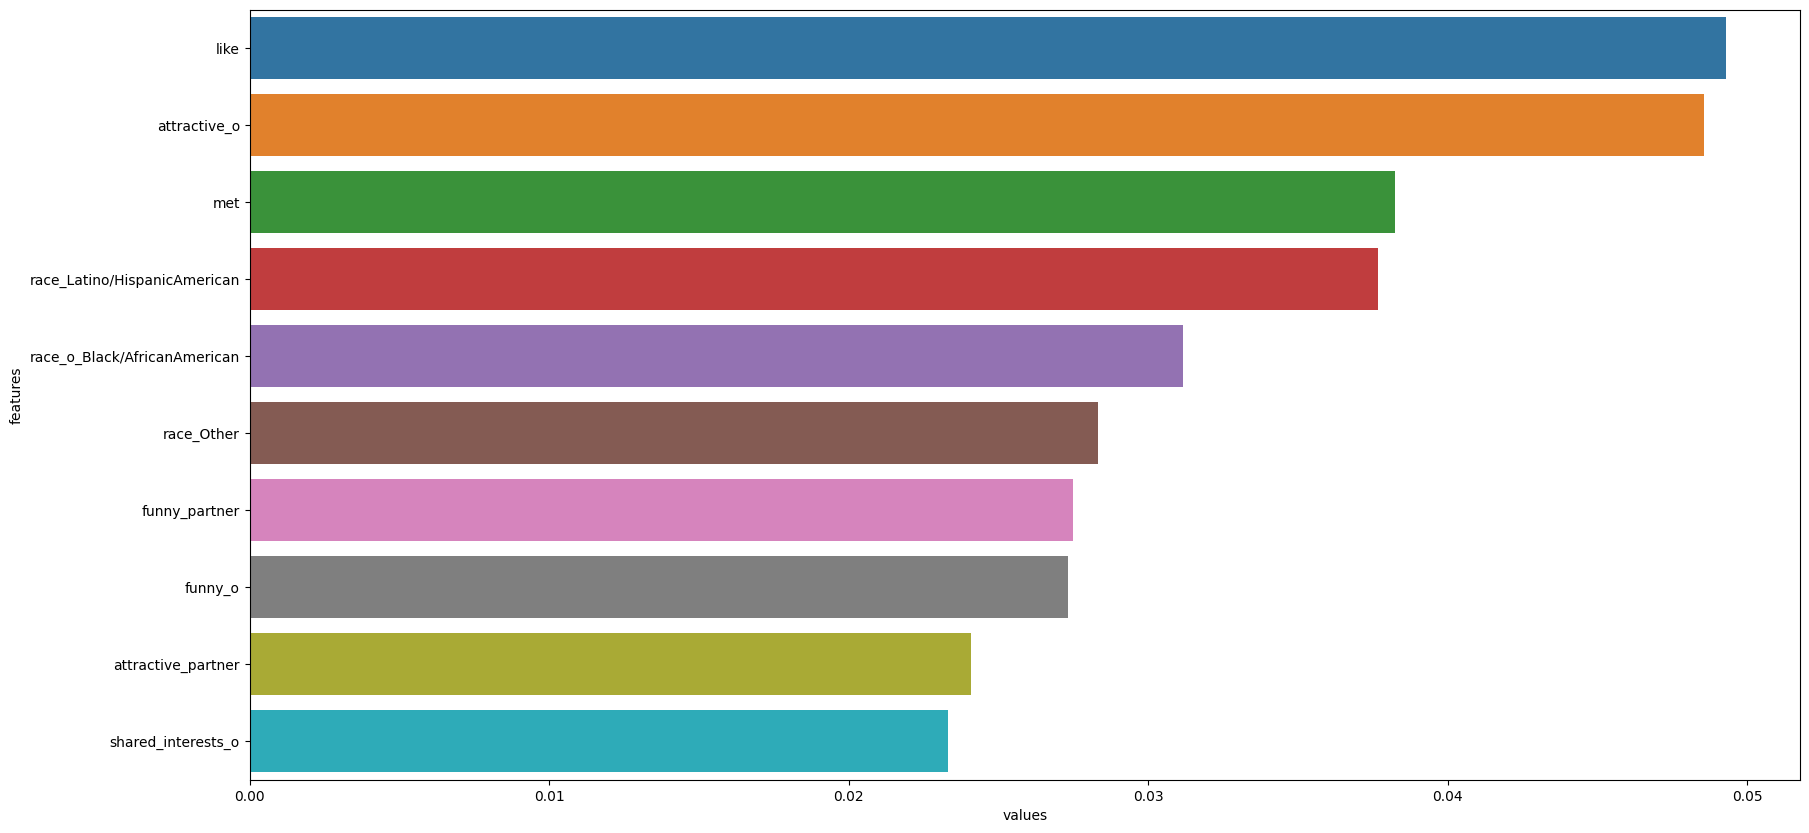

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='values', y='features', data=feature_imp.sort_values(by='values', ascending=False).head(10))

# 모델 이해하기

트리 모델의 진화 과정
- 결정 트리: 가장 기본적인 트리 모델
- 배깅: 부트스트랩 훈련셋을 사용하는 트리 모델
- 랜덤 포레스트: 데이터와 변수의 일부를 사용하여 여러 트리를 만드는 모델
- 부스팅: 이전 트리의 학습 내용을 다음 틜에 반영하려 여러 트리를 만드는 방법
- 경사 부스팅: 부스팅에 경사 하강법을 적용한 모델
- XG 부스팅: 경사 부스팅에서 계산속도와 알고리즘 효율을 개선한 모델

### 1. 배깅
부트스트랩(bootstrap) 훈련셋을 사용하는 트리 모델
- 부트스트랩: 데이터의 일부분을 무작위로 반복 추출하는 방법

### 2. 부스팅과 에이다부스트
부스팅(Boosting): 랜덤 포레스트에서 한 단계 더 발전한 방법으로 역시 여러 트리를 만드는 모델
- 랜덤 포레스트에서 각 트리는 독립적이나, 부스팅에서는 그렇지 않음
- 부스팅은 각 트리를 순차적으로 만들면서 이전 트리의 정보를 이용함
- 부분집합을 이용해 첫 트리를 만들고 난 후, 해당 트리의 예측 결과를 반영하여 두 번재 트리를 만들어서 첫 번재 트리와의 시너지 효과를 키움
- 트리를 계속하여 만들 때마다 이런 식으로 이전 트리의 정보를 이용한다는 점이 랜덤포레스트와 다음

에이다부스트(AdaBoost): 단계적으로 트리를 만들 때 이전 단계에서의 분류 결과에 따라 각 데이터에 가중치를 부여/수정함
- 이전 트리에서 가중치가 덜 부여되고 잘못 분류된 데이터들에 더 높은 가중치를 부여하고
- 후속 트리에서는 가중치가 높은 데이터를 분류하는데 우선순위를 둠
- 이런 방식으로 트리 여러 개를 만들면 분류가 복잡한 데이터셋도 세부적으로 나눌 수 있는 모델이 만들어짐

### 3. 경사 부스팅과 XGBoost
경사 부스팅(Gradient boosting): 경사하강법을 이용하여, 이전 모델의 에러를 기반으로 다음 트리를 만들어감
- XGBoost, LightGBM, Catboost

XGBoost(Extreme Gradient Boosting): 계산 성능 최적화와 알고리즘 개선을 함께 이룸
- 순차적으로 트리를 만들지만, 병렬화, 분산 컴퓨팅, 캐시 최적화 등을 활용해 계산 속도가 이전 부스팅 모델보다 훨씬 빠름
- 2차 도함수를 활용해 더 적절한 이동 방향과 이동 크기를 찾아내어 더 빠른 시간에 전역 최솟값에 도달함
- 정규화 하이퍼 파라미터 LASSO, Ridge 지원